In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import json

# Datos completos de los clientes

In [18]:
clients_data = pd.read_csv('datos_de_clientes.csv', delimiter='\t')
clients_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### visualización de todos los datos 

In [ ]:
#show all the data withouth truncating

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
clients_data

## tranformaciones

### Asignar id a los valores String de educación y estado civil

In [20]:
# show the categories of the columns

keys = ['Education', 'Marital_Status']
education_categories = clients_data['Education'].unique()
Marital_categories = clients_data['Marital_Status'].unique()

# create a dictionary for each categories
education_categories_dict = dict(zip(education_categories, range(len(education_categories))))
marital_status_categories_dict = dict(zip(Marital_categories, range(len(Marital_categories))))

print(education_categories_dict)
print(marital_status_categories_dict)


{'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4}
{'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4, 'Alone': 5, 'Absurd': 6, 'YOLO': 7}


In [21]:
# asining a number to each category in a new column
clients_data['Education'] = clients_data['Education'].map(education_categories_dict)
clients_data['Marital_Status'] = clients_data['Marital_Status'].map(marital_status_categories_dict)

In [45]:
clients_data.head(25)

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,0,0,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,0,0,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,0,1,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,0,1,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,1,2,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,57,2,1,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,53,0,3,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,39,1,2,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,50,1,1,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,74,1,1,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


### generar las edades de los clientes

In [33]:
def edades(fecha_nacimiento):
    edad = 2024 - fecha_nacimiento
    return edad

clients_data['Age'] = clients_data['Year_Birth'].apply(edades)
age = clients_data.pop('Age')
clients_data.insert(2, 'Age', age)

clients_data.head(25)

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,0,0,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,0,0,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,0,1,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,0,1,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,1,2,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,0,2,61223.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,1,1,64014.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,0,3,56981.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,2,1,69245.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


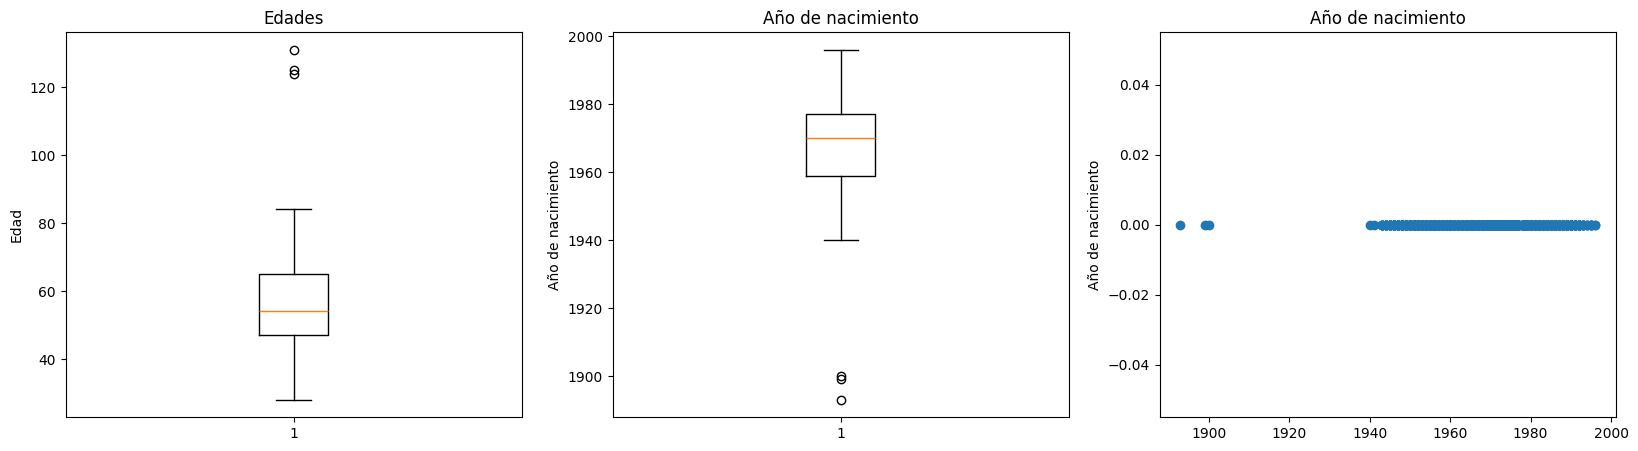

In [40]:
# ages and birth date boxplot

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].boxplot(clients_data['Age'])
ax[0].set_title('Edades')
ax[0].set_ylabel('Edad')
ax[1].boxplot(clients_data['Year_Birth'])
ax[1].set_title('Año de nacimiento')
ax[1].set_ylabel('Año de nacimiento')
ax[2].scatter(clients_data['Year_Birth'], np.zeros(len(clients_data['Year_Birth'])))
ax[2].set_title('Año de nacimiento')
ax[2].set_ylabel('Año de nacimiento')
plt.show()


Des pues de obtener las edades de todos los clientes presentes en el data set, nos dimos cuenta que habian algunos clientes que tenian edades aproximadas o superiores a los 120 años, valores que no tienen sentido y la verdad no son para nada utiles en el analisis a realizar en el reto, por lo que decidimos verificar cuales eran los años de nacimiento de dichas personas, además de observar la dispersión que generaban estos datos. 

Se puede ver que estas edades que generan ruido y dispersan las graficas, son inferiores al año 1930 por lo que si estos registros son eliminados para eliminar dicha dispersión y estandarizar el rango de las edades a uno mucho más util 

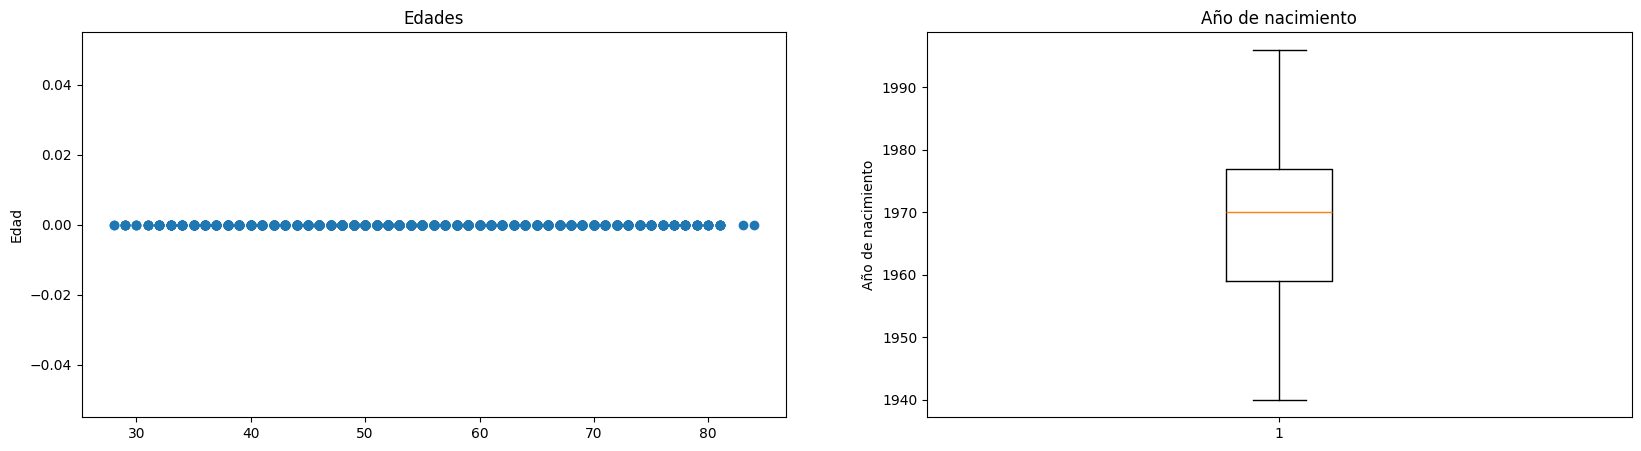

In [42]:
# drop the registers with a year of birth lower than 1930
clients_data = clients_data[clients_data['Year_Birth'] > 1930]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(clients_data['Age'], np.zeros(len(clients_data['Age'])))
ax[0].set_title('Edades')
ax[0].set_ylabel('Edad')
ax[1].boxplot(clients_data['Year_Birth'])
ax[1].set_title('Año de nacimiento')
ax[1].set_ylabel('Año de nacimiento')
plt.show()

Con estas nuevas graficas podemos ver que ya no tenemos datos outliers que genere ruido en los datos a analizar, ademas podemos ver que el rango de edades estan entre un poco menos de los 30 años y un poco más de los 80 años, valores que nos permiten analizar mucho mejor el grupo demografico al cual se le enfocara la campaña segun su edad